<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#linear-regression-in-python:-outliers-and--leverage-detect" data-toc-modified-id="linear-regression-in-python:-outliers-and--leverage-detect-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>linear regression in python: outliers and  leverage detect</a></span></li><li><span><a href="#High-leverage-point" data-toc-modified-id="High-leverage-point-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>High leverage point</a></span></li><li><span><a href="#Outlier" data-toc-modified-id="Outlier-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Outlier</a></span></li><li><span><a href="#High-leverage-point-(30,10)" data-toc-modified-id="High-leverage-point-(30,10)-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>High leverage point (30,10)</a></span></li></ul></div>

# linear regression in python: outliers and  leverage detect

Outliers: In linear regression, an outlier is an observation with large residual. In other words, it is an observation whose dependent-variable value is unusual given its values on the predictor variables. An outlier may indicate a sample peculiarity or may indicate a data entry error or other problem.

Leverage: An observation with an extreme value on a predictor variable is called a point with high leverage. Leverage is a measure of how far an observation deviates from the mean of that variable. These leverage points can have an effect on the estimate of regression coefficients.

Influence: An observation is said to be influential if removing the observation substantially changes the estimate of coefficients. Influence can be thought of as the product of leverage and outlierness.

https://songhuiming.github.io/pages/2016/11/27/linear-regression-in-python-outliers-leverage-detect/

In [2]:
import pandas as pd
import numpy as np
import itertools
from itertools import chain, combinations
import statsmodels.formula.api as smf
import scipy.stats as scipystats
import statsmodels.api as sm
import statsmodels.stats.stattools as stools
import statsmodels.stats as stats 
from statsmodels.graphics.regressionplots import *
import matplotlib.pyplot as plt
import seaborn as sns
import copy
from sklearn.model_selection import train_test_split
import math
import time

%matplotlib inline 
plt.rcParams['figure.figsize'] = (12, 8)

The rsquared values is 0.5759696028216693


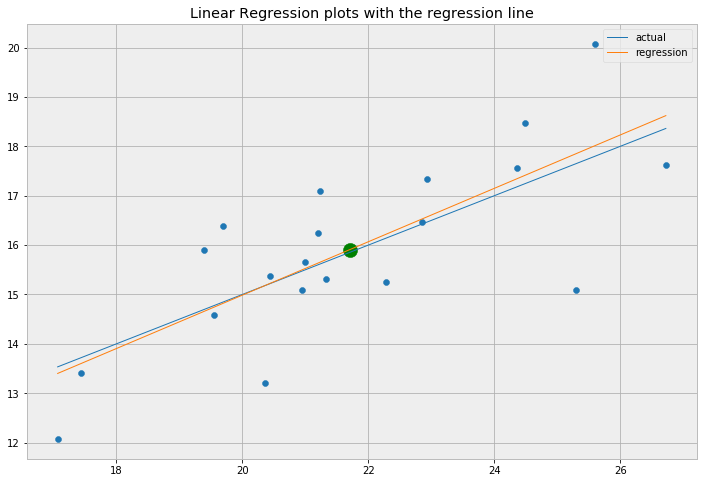

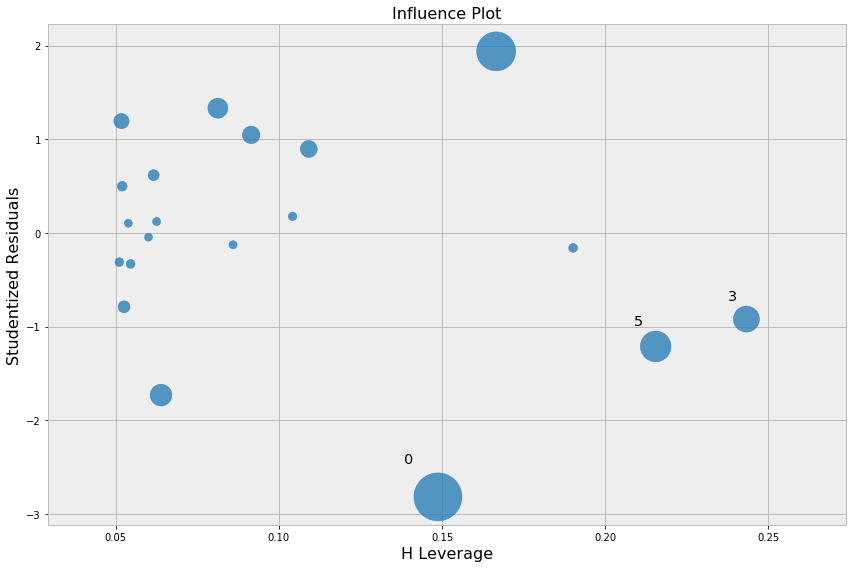

In [9]:
np.random.seed(0)
x1 = np.random.normal(20, 3, 20)
y0 = 5 + 0.5 * x1
y1 = 5 + 0.5 * x1 + np.random.normal(0, 1, 20)

lm = sm.OLS(y1, sm.add_constant(x1)).fit()
print("The rsquared values is " + str(lm.rsquared))

# first plot
plt.scatter(np.sort(x1), y1[np.argsort(x1)])
plt.scatter(np.mean(x1), np.mean(y1), color = "green",s=200)
plt.plot(np.sort(x1), y0[np.argsort(x1)], label = "actual")
plt.plot(np.sort(x1), lm.predict()[np.argsort(x1)], label = "regression")
plt.title("Linear Regression plots with the regression line")
plt.legend()

# second plot
fig, ax = plt.subplots(figsize=(12,8))
fig = sm.graphics.influence_plot(lm, alpha  = 0.05, ax = ax, criterion="cooks")

plt.tight_layout()

The first graph includes the (x, y) scatter plot, the actual function generates the data(blue line) and the predicted linear regression line(green line). The linear regression will go through the average point (x¯,y¯) all the time.

The second graph is the Leverage v.s. Studentized residuals plot. y axis(verticle axis) is the studentized residuals indicating if there is any outliers based on the alpha value(significace level). It shows point 0(the first data point) is like an outlier a little based on current alpha. Point 5 and 3 are high leverage data points. Generally there isn't any issue with this regression fitting.

# High leverage point

There is high leverage point (30, 20.8). This point has higher leverage than the others but There is no outliers. Because of this, its R2=0.684 which is higher than the case 1.

The rsquared values is 0.6835270587597565


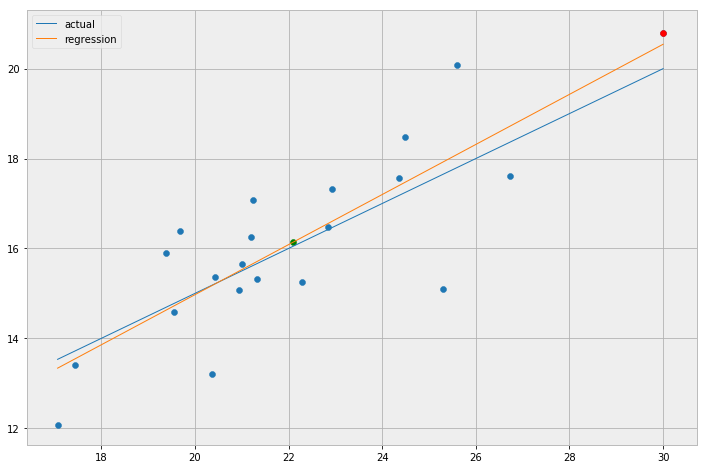

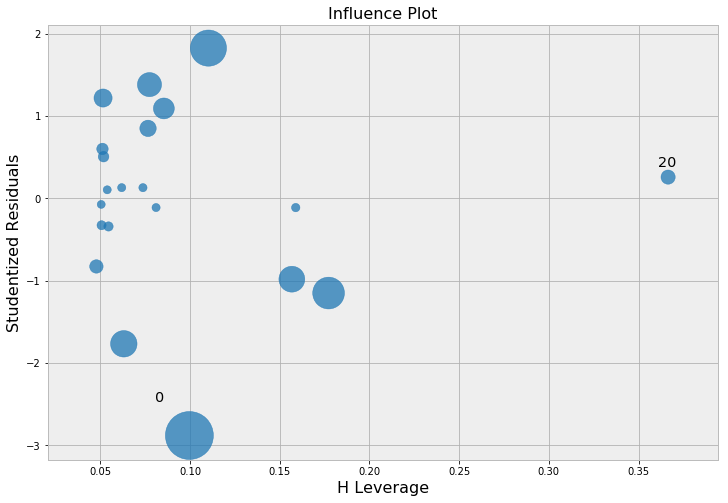

In [10]:
x2 = np.r_[x1, 30]
y2 = np.r_[y1, 20.8]
y20 = np.r_[y0, 20]

lm2 = sm.OLS(y2, sm.add_constant(x2)).fit()
print("The rsquared values is " + str(lm2.rsquared))

plt.scatter(np.sort(x2), y2[np.argsort(x2)])
plt.scatter(30, 20.8, color = "red")
plt.scatter(np.mean(x2), np.mean(y2), color = "green")
plt.plot(np.sort(x2), y20[np.argsort(x2)], label = "actual")
plt.plot(np.sort(x2), lm2.predict()[np.argsort(x2)], label = "regression")
plt.legend()
plt.plot()

fig, ax = plt.subplots(figsize=(12,8))
fig = sm.graphics.influence_plot(lm2, ax= ax, criterion="cooks")

# Outlier
There is an outlier (19, 20.8). It has high normalized residual. Different from high leverage point, the outlier will distort the regression line thus the R2 is down to 0.274.

The rsquared values is 0.2737752662801516


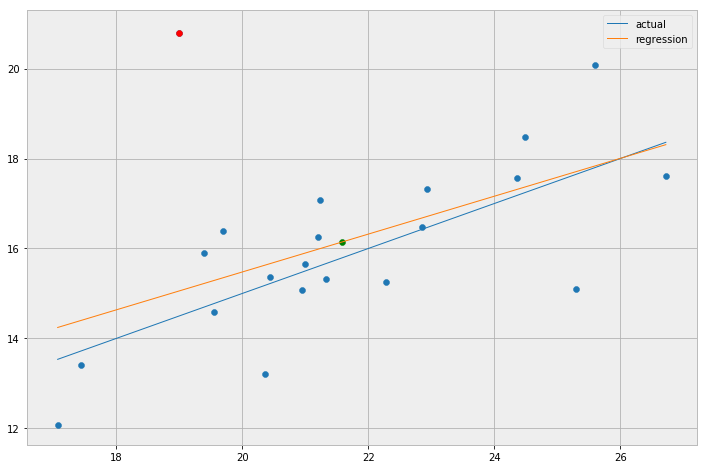

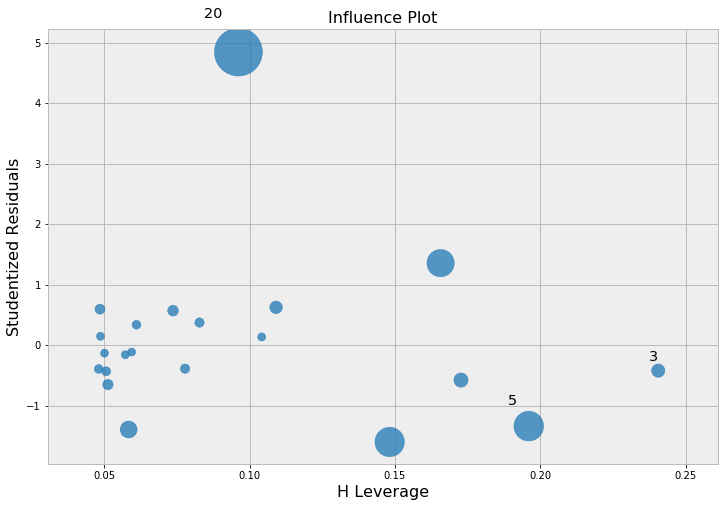

In [11]:
x3 = np.r_[x1, 19]
y3 = np.r_[y1, 20.8]
y30 = np.r_[y0, 5 + .5 * 19]

lm3 = sm.OLS(y3, sm.add_constant(x3)).fit()
print("The rsquared values is " + str(lm3.rsquared))

plt.scatter(np.sort(x3), y3[np.argsort(x3)])
plt.scatter(19, 20.8, color = "red")
plt.scatter(np.mean(x3), np.mean(y3), color = "green")
plt.plot(np.sort(x3), y30[np.argsort(x3)], label = "actual")
plt.plot(np.sort(x3), lm3.predict()[np.argsort(x3)], label = "regression")
plt.legend()
plt.plot()

fig, ax = plt.subplots(figsize=(12,8))
fig = sm.graphics.influence_plot(lm3, ax= ax, criterion="cooks")

# High leverage point (30,10)
There is high leverage and outlier point (30, 10). The regression line was distorted severely. R2 = 0.029 which is very low.

The rsquared values is 0.028865535723009983


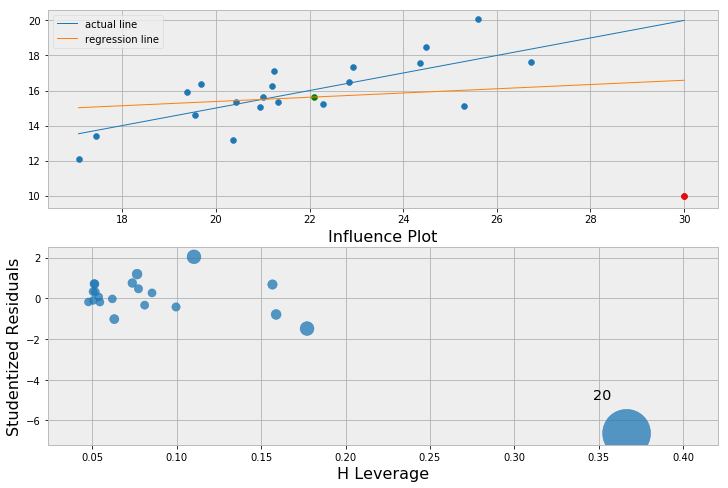

In [14]:
x4 = np.r_[x1, 30]
y4 = np.r_[y1, 10]
y40 = np.r_[y0, 20]

lm4 = sm.OLS(y4, sm.add_constant(x4)).fit()
print("The rsquared values is " + str(lm4.rsquared))


fig = plt.figure()
ax = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

ax.scatter(np.sort(x4), y4[np.argsort(x4)])
ax.scatter(30, 10, color = "red")
ax.scatter(np.mean(x4), np.mean(y4), color = "green")
ax.plot(np.sort(x4), y40[np.argsort(x4)], label = "actual line")
ax.plot(np.sort(x4), lm4.predict()[np.argsort(x4)], label = "regression line")
ax.legend()

sm.graphics.influence_plot(lm4, ax = ax2, criterion="cooks")
plt.show()